In [6]:
# CHAPTER 1: AI ARCHITECTURE

In [7]:
import pandas as pd
import re

# Load dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
print(f"Total reviews: {len(df)}")

# Remove missing reviews
df = df[df['Review Text'].notna()]
print(f"Valid reviews: {len(df)}")
print(f"Removed {23486 - len(df)} missing reviews")

# Label sentiment based on rating#~
# 1-2 stars = negative (0), 3 stars = neutral (1), 4-5 stars = positive (2)
def label_sentiment(rating):
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

df['sentiment'] = df['Rating'].apply(label_sentiment)

# Check distribution
print("\nSentiment counts:")
print(f"Positive: {(df['sentiment']==2).sum()} ({(df['sentiment']==2).sum()/len(df)*100:.1f}%)")
print(f"Neutral: {(df['sentiment']==1).sum()} ({(df['sentiment']==1).sum()/len(df)*100:.1f}%)")
print(f"Negative: {(df['sentiment']==0).sum()} ({(df['sentiment']==0).sum()/len(df)*100:.1f}%)")

Total reviews: 23486
Valid reviews: 22641
Removed 845 missing reviews

Sentiment counts:
Positive: 17448 (77.1%)
Neutral: 2823 (12.5%)
Negative: 2370 (10.5%)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Count words in each review
df['word_count'] = df['Review Text'].str.split().str.len()
print(f"Average words: {df['word_count'].mean():.1f}")

# Find contractions (words with apostrophes)
has_contractions = df['Review Text'].str.contains("'", na=False).sum()
print(f"Reviews with contractions: {has_contractions} ({has_contractions/len(df)*100:.1f}%)")

# Find numbers in reviews
has_numbers = df['Review Text'].str.contains(r'\d', na=False).sum()
print(f"Reviews with numbers: {has_numbers} ({has_numbers/len(df)*100:.1f}%)")

# Find multiple exclamation marks
multi_exclamation = df['Review Text'].str.count('!').gt(1).sum()
print(f"Multiple exclamations: {multi_exclamation} ({multi_exclamation/len(df)*100:.1f}%)")

Average words: 60.2
Reviews with contractions: 13969 (61.7%)
Reviews with numbers: 8790 (38.8%)
Multiple exclamations: 3311 (14.6%)


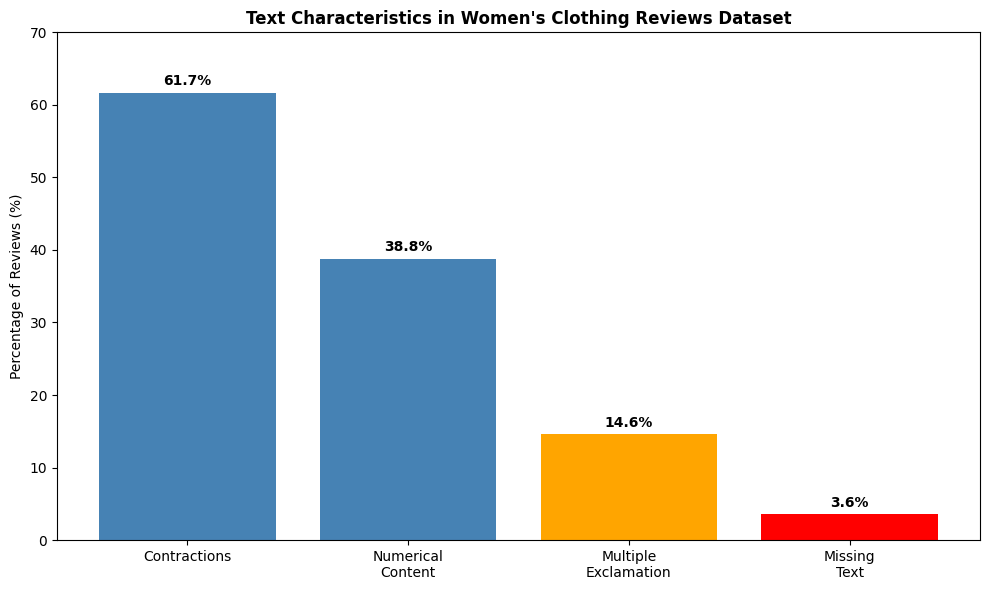

In [9]:
# Make bar chart with actual percentages
categories = ['Contractions', 'Numerical\nContent', 'Multiple\nExclamation', 'Missing\nText']
percentages = [61.7, 38.8, 14.6, 3.6]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=['steelblue', 'steelblue', 'orange', 'red'])
plt.ylabel('Percentage of Reviews (%)')
plt.title('Text Characteristics in Women\'s Clothing Reviews Dataset', fontweight='bold')
plt.ylim(0, 70)

# Add labels
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{pct:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('text_characteristics.png', dpi=300)
plt.show()

In [10]:
# Basic text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # remove urls
    text = re.sub(r'[^a-z0-9\s\']', ' ', text)  # keep letters, numbers, spaces, apostrophes
    text = re.sub(r'\s+', ' ', text).strip()  # fix spaces
    return text

# Apply to all reviews
df['cleaned_text'] = df['Review Text'].apply(clean_text)

# Show example
print("Example:")
print("Original:", df['Review Text'].iloc[10])
print("\nCleaned:", df['cleaned_text'].iloc[10])

Example:
Original: Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.

Cleaned: dress runs small esp where the zipper area runs i ordered the sp which typically fits me and it was very tight the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric pretty disappointed as it was going to be my christmas dress this year needless to say it will be going back


In [11]:
# Expand contractions
def expand_contractions(text):
    text = text.replace("i'm", "i am")
    text = text.replace("it's", "it is")
    text = text.replace("don't", "do not")
    text = text.replace("didn't", "did not")
    text = text.replace("can't", "cannot")
    text = text.replace("won't", "will not")
    text = text.replace("i've", "i have")
    text = text.replace("you're", "you are")
    text = text.replace("they're", "they are")
    text = text.replace("we're", "we are")
    text = text.replace("isn't", "is not")
    text = text.replace("wasn't", "was not")
    text = text.replace("aren't", "are not")
    text = text.replace("weren't", "were not")
    text = text.replace("haven't", "have not")
    text = text.replace("hasn't", "has not")
    text = text.replace("hadn't", "had not")
    text = text.replace("couldn't", "could not")
    text = text.replace("wouldn't", "would not")
    text = text.replace("shouldn't", "should not")
    return text

# Apply to dataset
df['expanded_text'] = df['cleaned_text'].apply(expand_contractions)

# Show example
print("Example contraction expansion:")
sample = df[df['cleaned_text'].str.contains("don't|didn't|can't", na=False)].iloc[0]
print("Before:", sample['cleaned_text'])
print("\nAfter:", sample['expanded_text'])

Example contraction expansion:
Before: bought the black xs to go under the larkspur midi dress because they didn't bother lining the skirt portion grrrrrrrrrrr my stats are 34a 28 29 36 and the xs fit very smoothly around the chest and was flowy around my lower half so i would say it's running big the straps are very pretty and it could easily be nightwear too i'm 5'6 and it came to just below my knees

After: bought the black xs to go under the larkspur midi dress because they did not bother lining the skirt portion grrrrrrrrrrr my stats are 34a 28 29 36 and the xs fit very smoothly around the chest and was flowy around my lower half so i would say it is running big the straps are very pretty and it could easily be nightwear too i am 5'6 and it came to just below my knees


In [12]:
# Simple tokenization by splitting on spaces
def tokenize_text(text):
    return text.split()

# Apply tokenization
df['tokens'] = df['expanded_text'].apply(tokenize_text)

# Show example
print("Tokenization example:")
sample_text = df['expanded_text'].iloc[0]
tokens = tokenize_text(sample_text)
print("Text:", sample_text[:150], "...")
print("\nTokens:", tokens[:20], "...")
print(f"\nTotal tokens: {len(tokens)}")

Tokenization example:
Text: absolutely wonderful silky and sexy and comfortable ...

Tokens: ['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable'] ...

Total tokens: 7


In [13]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords', quiet=True)

# Get English stopwords but keep sentiment words
stop_words = set(stopwords.words('english'))
keep_words = {'not', 'no', 'nor', 'never', 'very', 'really', 'but', 'too', 'so'}
stop_words = stop_words - keep_words

# Remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words and len(word) > 2]

# Apply to dataset
df['filtered_tokens'] = df['tokens'].apply(remove_stopwords)

# Show example
print("Stopword removal example:")
sample_tokens = ['this', 'dress', 'is', 'not', 'good', 'but', 'very', 'cheap']
print("Before:", sample_tokens)
print("After:", remove_stopwords(sample_tokens))

# Show real example from dataset
print("\nReal example:")
original_tokens = df['tokens'].iloc[2][:15]
filtered_tokens = df['filtered_tokens'].iloc[2][:15]
print("Before:", original_tokens)
print("After:", filtered_tokens)

Stopword removal example:
Before: ['this', 'dress', 'is', 'not', 'good', 'but', 'very', 'cheap']
After: ['dress', 'not', 'good', 'but', 'very', 'cheap']

Real example:
Before: ['i', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for']
After: ['high', 'hopes', 'dress', 'really', 'wanted', 'work', 'initially', 'ordered', 'petite', 'small', 'usual', 'size', 'but', 'found', 'outrageously']


In [14]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Create lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply to dataset
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lemmatize_tokens)

# Show example
print("Lemmatization example:")
sample_tokens = ['loved', 'dresses', 'running', 'better', 'beautiful', 'straps', 'knees']
print("Before:", sample_tokens)
print("After:", lemmatize_tokens(sample_tokens))

# Show real example
print("\nReal example:")
before = df['filtered_tokens'].iloc[2][:10]
after = df['lemmatized_tokens'].iloc[2][:10]
print("Before:", before)
print("After:", after)

Lemmatization example:
Before: ['loved', 'dresses', 'running', 'better', 'beautiful', 'straps', 'knees']
After: ['loved', 'dress', 'running', 'better', 'beautiful', 'strap', 'knee']

Real example:
Before: ['high', 'hopes', 'dress', 'really', 'wanted', 'work', 'initially', 'ordered', 'petite', 'small']
After: ['high', 'hope', 'dress', 'really', 'wanted', 'work', 'initially', 'ordered', 'petite', 'small']


In [15]:
# Complete preprocessing function
def preprocess_text(text):
    # Clean
    text = clean_text(text)
    # Expand contractions
    text = expand_contractions(text)
    # Tokenize
    tokens = tokenize_text(text)
    # Remove stopwords
    tokens = remove_stopwords(tokens)
    # Lemmatize
    tokens = lemmatize_tokens(tokens)
    # Join back to string
    return ' '.join(tokens)

# Apply complete pipeline
df['processed_text'] = df['Review Text'].apply(preprocess_text)

# Show full transformation example
print("="*80)
print("COMPLETE PREPROCESSING TRANSFORMATION")
print("="*80)
idx = 2  # using same example as before
print("\nORIGINAL:")
print(df['Review Text'].iloc[idx][:200])
print("\nFINAL PROCESSED:")
print(df['processed_text'].iloc[idx][:200])

# Calculate statistics
original_avg = df['Review Text'].str.split().str.len().mean()
processed_avg = df['processed_text'].str.split().str.len().mean()
reduction = (1 - processed_avg/original_avg) * 100

print(f"\n\nSTATISTICS:")
print(f"Average tokens before: {original_avg:.1f}")
print(f"Average tokens after: {processed_avg:.1f}")
print(f"Reduction: {reduction:.1f}%")

COMPLETE PREPROCESSING TRANSFORMATION

ORIGINAL:
I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could 

FINAL PROCESSED:
high hope dress really wanted work initially ordered petite small usual size but found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely but b


STATISTICS:
Average tokens before: 60.2
Average tokens after: 30.3
Reduction: 49.6%


In [16]:
# Check that negations are preserved
negation_check = df[df['Review Text'].str.contains("don't|didn't|not", na=False)].iloc[0]

print("NEGATION PRESERVATION CHECK:")
print("="*80)
print("\nOriginal:")
print(negation_check['Review Text'][:150])
print("\nProcessed:")
print(negation_check['processed_text'][:150])

# Verify no empty reviews
empty_count = (df['processed_text'].str.len() == 0).sum()
print(f"\n\nEMPTY REVIEWS AFTER PREPROCESSING: {empty_count}")

# Show a few more examples
print("\n" + "="*80)
print("ADDITIONAL EXAMPLES:")
print("="*80)

for i in [5, 10, 15]:
    print(f"\n--- Example {i} ---")
    print(f"Original: {df['Review Text'].iloc[i][:100]}...")
    print(f"Processed: {df['processed_text'].iloc[i][:100]}...")

NEGATION PRESERVATION CHECK:

Original:
I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be 

Processed:
high hope dress really wanted work initially ordered petite small usual size but found outrageously small small fact could not zip reordered petite me


EMPTY REVIEWS AFTER PREPROCESSING: 0

ADDITIONAL EXAMPLES:

--- Example 5 ---
Original: I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and...
Processed: love tracy reese dress but one not very petite foot tall usually wear brand dress very pretty packag...

--- Example 10 ---
Original: Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was...
Processed: dress run small esp zipper area run ordered typically fit very tight material top look feel very che...

--- Example 15 ---
Original: I took these out of the package and wanted them to fit so 

In [17]:
# CHAPTER 2 DATA ANALYSIS

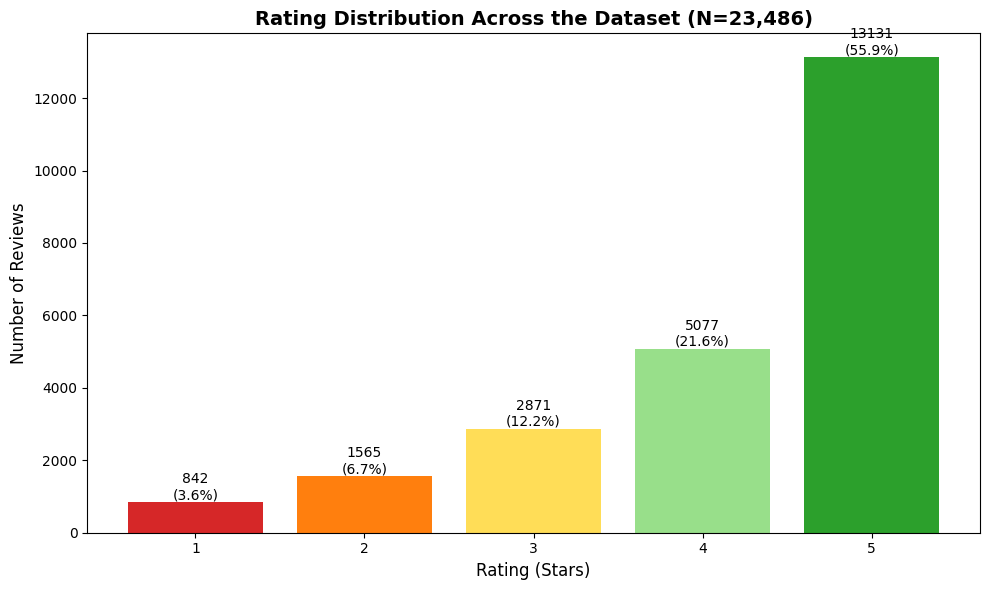

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Create rating distribution
plt.figure(figsize=(10, 6))
rating_counts = df['Rating'].value_counts().sort_index()
bars = plt.bar(rating_counts.index, rating_counts.values, color=['#d62728', '#ff7f0e', '#ffdd57', '#98df8a', '#2ca02c'])

# Add labels
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Rating Distribution Across the Dataset (N=23,486)', fontsize=14, fontweight='bold')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom')

plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.savefig('figure1_rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-912773862.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Sentiment', y='text_length',


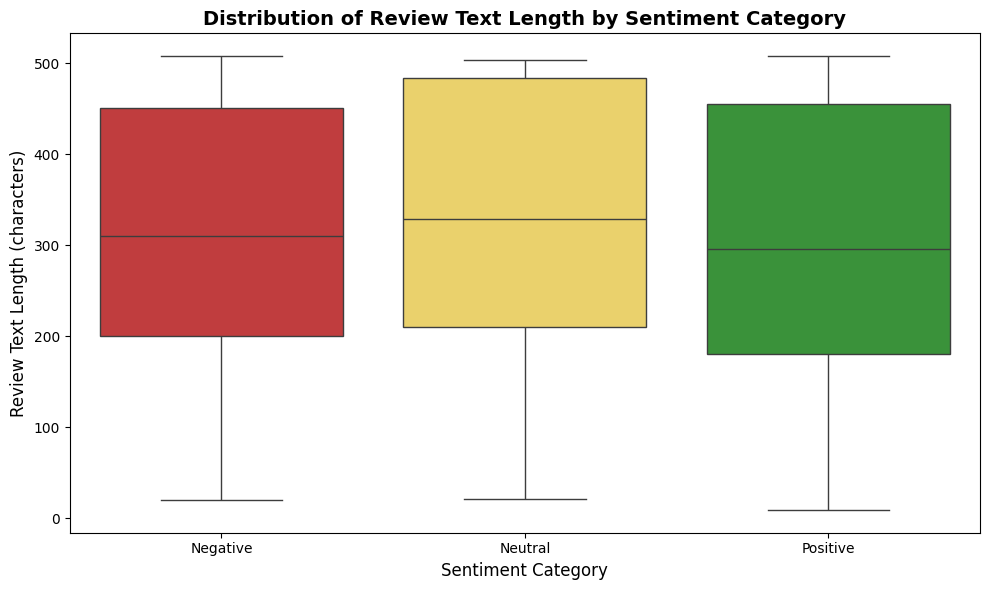

In [19]:
# Create sentiment labels
df_clean = df[df['Review Text'].notna()].copy()
df_clean['text_length'] = df_clean['Review Text'].str.len()

# Create sentiment categories
df_clean['Sentiment'] = df_clean['Rating'].apply(
    lambda x: 'Positive' if x >= 4 else ('Neutral' if x == 3 else 'Negative')
)

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Sentiment', y='text_length',
            order=['Negative', 'Neutral', 'Positive'],
            palette=['#d62728', '#ffdd57', '#2ca02c'])

plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Review Text Length (characters)', fontsize=12)
plt.title('Distribution of Review Text Length by Sentiment Category', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('figure2_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

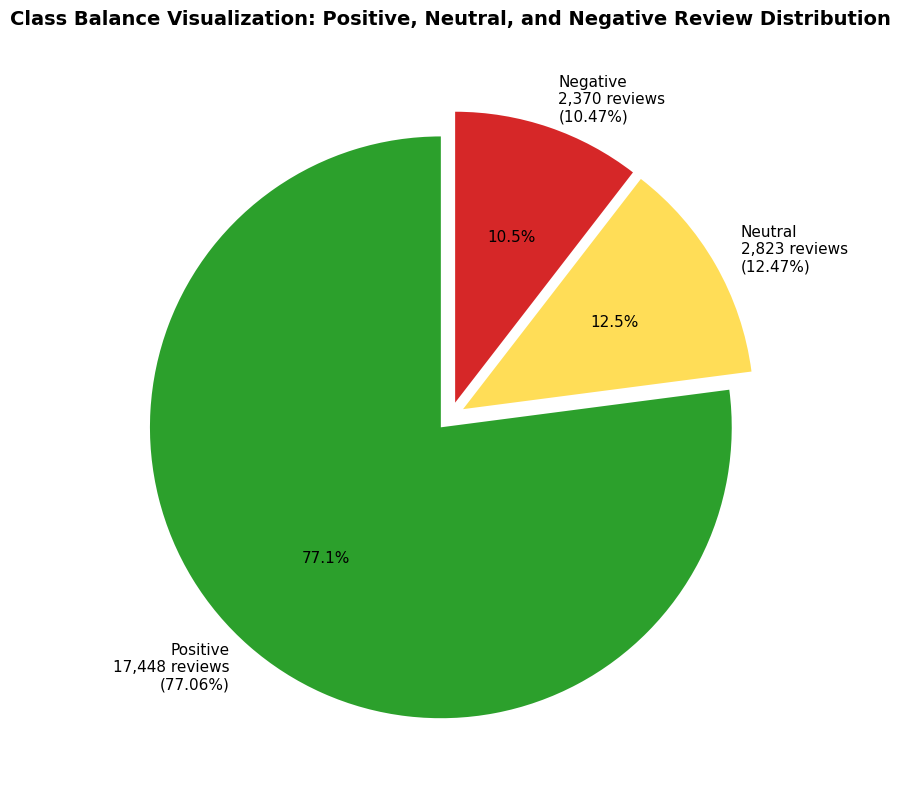

In [20]:
# Calculate sentiment distribution
sentiment_counts = df_clean['Sentiment'].value_counts()
sentiment_pct = (sentiment_counts / len(df_clean) * 100).round(2)

# Create pie chart
plt.figure(figsize=(10, 8))
colors = ['#2ca02c', '#ffdd57', '#d62728']
explode = (0.05, 0.05, 0.05)

plt.pie(sentiment_counts.values,
        labels=[f'{label}\n{count:,} reviews\n({sentiment_pct[label]:.2f}%)'
                for label, count in sentiment_counts.items()],
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        textprops={'fontsize': 11})

plt.title('Class Balance Visualization: Positive, Neutral, and Negative Review Distribution',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('figure3_class_balance.png', dpi=300, bbox_inches='tight')
plt.show()

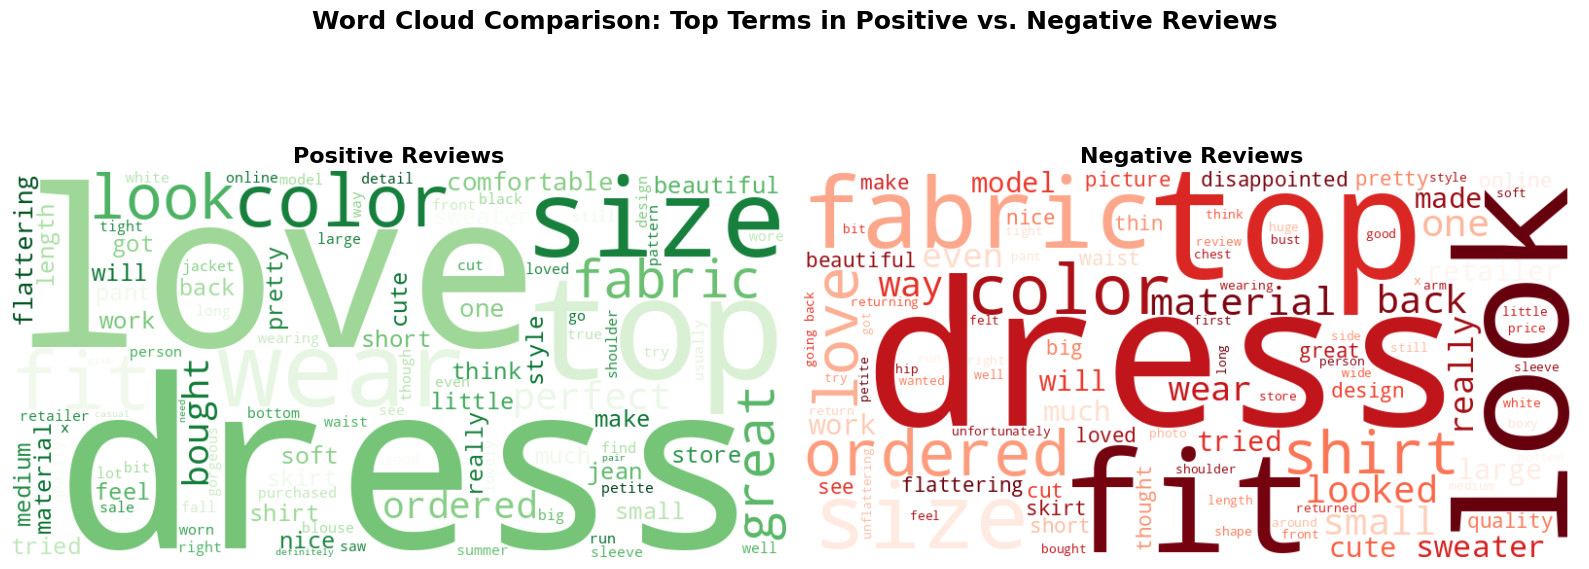

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_text = ' '.join(df_clean[df_clean['Sentiment'] == 'Positive']['Review Text'].dropna())
negative_text = ' '.join(df_clean[df_clean['Sentiment'] == 'Negative']['Review Text'].dropna())

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Positive word cloud
wordcloud_pos = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap='Greens',
                          max_words=100).generate(positive_text)

ax1.imshow(wordcloud_pos, interpolation='bilinear')
ax1.set_title('Positive Reviews', fontsize=16, fontweight='bold')
ax1.axis('off')

# Negative word cloud
wordcloud_neg = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap='Reds',
                          max_words=100).generate(negative_text)

ax2.imshow(wordcloud_neg, interpolation='bilinear')
ax2.set_title('Negative Reviews', fontsize=16, fontweight='bold')
ax2.axis('off')

plt.suptitle('Word Cloud Comparison: Top Terms in Positive vs. Negative Reviews',
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('figure4_wordcloud_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

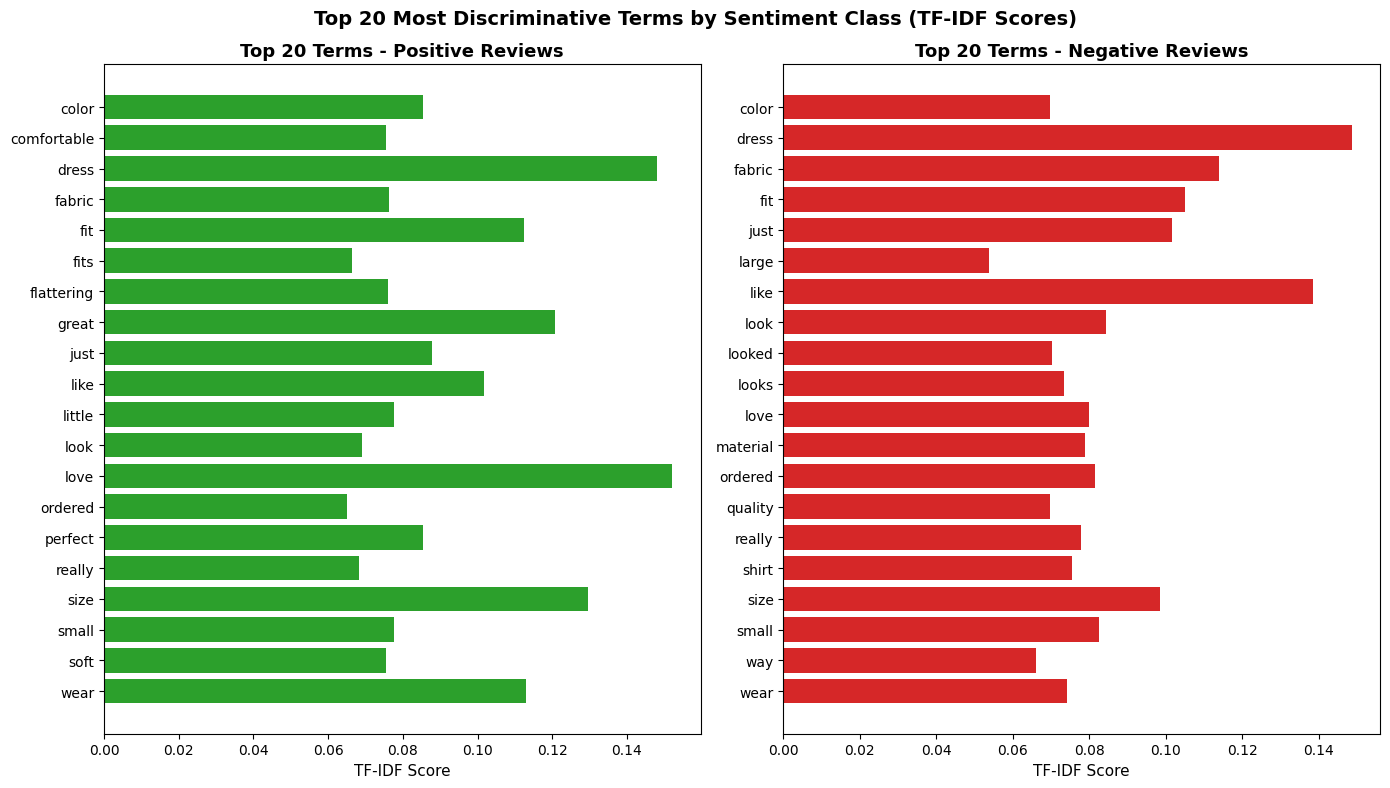

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Prepare data - exclude neutral for clearer visualization
df_binary = df_clean[df_clean['Sentiment'] != 'Neutral'].copy()

# TF-IDF for positive reviews
vectorizer_pos = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_pos = vectorizer_pos.fit_transform(
    df_binary[df_binary['Sentiment'] == 'Positive']['Review Text'].fillna('')
)
pos_words = vectorizer_pos.get_feature_names_out()
pos_scores = np.asarray(tfidf_pos.mean(axis=0)).flatten()

# TF-IDF for negative reviews
vectorizer_neg = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_neg = vectorizer_neg.fit_transform(
    df_binary[df_binary['Sentiment'] == 'Negative']['Review Text'].fillna('')
)
neg_words = vectorizer_neg.get_feature_names_out()
neg_scores = np.asarray(tfidf_neg.mean(axis=0)).flatten()

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Positive terms
ax1.barh(range(len(pos_words)), pos_scores, color='#2ca02c')
ax1.set_yticks(range(len(pos_words)))
ax1.set_yticklabels(pos_words)
ax1.set_xlabel('TF-IDF Score', fontsize=11)
ax1.set_title('Top 20 Terms - Positive Reviews', fontsize=13, fontweight='bold')
ax1.invert_yaxis()

# Negative terms
ax2.barh(range(len(neg_words)), neg_scores, color='#d62728')
ax2.set_yticks(range(len(neg_words)))
ax2.set_yticklabels(neg_words)
ax2.set_xlabel('TF-IDF Score', fontsize=11)
ax2.set_title('Top 20 Terms - Negative Reviews', fontsize=13, fontweight='bold')
ax2.invert_yaxis()

plt.suptitle('Top 20 Most Discriminative Terms by Sentiment Class (TF-IDF Scores)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('figure5_tfidf_terms.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
# CHAPTER 3: APPLICATION OF AI METHODS

In [24]:
!pip install vaderSentiment
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import time


# Load data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df = df[df['Review Text'].notna()].copy()

# Label sentiment
def get_sentiment(rating):
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

df['sentiment'] = df['Rating'].apply(get_sentiment)
df['text'] = df['Review Text'].str.lower()

print(f"Total reviews: {len(df)}")
print("\nSentiment counts:")
print(f"Negative: {(df['sentiment']==0).sum()}")
print(f"Neutral: {(df['sentiment']==1).sum()}")
print(f"Positive: {(df['sentiment']==2).sum()}")

Total reviews: 22641

Sentiment counts:
Negative: 2370
Neutral: 2823
Positive: 17448


In [25]:
# Split data - 80% train, 10% validation, 10% test
X = df['text']
y = df['sentiment']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.111, random_state=42, stratify=y_temp)

print(f"Train: {len(X_train)} reviews")
print(f"Validation: {len(X_val)} reviews")
print(f"Test: {len(X_test)} reviews")

print("\nTraining distribution:")
for i in [0, 1, 2]:
    count = (y_train == i).sum()
    print(f"Class {i}: {count} ({count/len(y_train)*100:.1f}%)")

print("\nValidation distribution:")
for i in [0, 1, 2]:
    count = (y_val == i).sum()
    print(f"Class {i}: {count} ({count/len(y_val)*100:.1f}%)")

Train: 18114 reviews
Validation: 2262 reviews
Test: 2265 reviews

Training distribution:
Class 0: 1896 (10.5%)
Class 1: 2259 (12.5%)
Class 2: 13959 (77.1%)

Validation distribution:
Class 0: 237 (10.5%)
Class 1: 282 (12.5%)
Class 2: 1743 (77.1%)


In [26]:
# Import VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
vader = SentimentIntensityAnalyzer()

# Function to classify using VADER thresholds
def classify_vader(text):
    scores = vader.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 2  # Positive
    elif compound <= -0.05:
        return 0  # Negative
    else:
        return 1  # Neutral

# Apply VADER to validation set
print("="*70)
print("VADER RULE-BASED APPROACH")
print("="*70)

vader_predictions = X_val.apply(classify_vader)

# Calculate accuracy
vader_accuracy = (vader_predictions == y_val).sum() / len(y_val) * 100
print(f"\nVADER Validation Accuracy: {vader_accuracy:.2f}%")

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_val, vader_predictions,
                          target_names=['Negative', 'Neutral', 'Positive']))

VADER RULE-BASED APPROACH

VADER Validation Accuracy: 78.12%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.45      0.22      0.29       237
     Neutral       0.26      0.03      0.06       282
    Positive       0.81      0.98      0.89      1743

    accuracy                           0.78      2262
   macro avg       0.51      0.41      0.41      2262
weighted avg       0.70      0.78      0.72      2262



In [27]:
# TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

print(f"Features: {X_train_vec.shape[1]}")

# Calculate class weights for imbalance
weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
print(f"\nClass weights:")
for i, w in enumerate(weights):
    print(f"Class {i}: {w:.2f}")

Features: 5000

Class weights:
Class 0: 3.18
Class 1: 2.67
Class 2: 0.43


In [28]:
# Model 1: Naive Bayes
print("="*60)
print("Naive Bayes")
print("="*60)

start = time.time()
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
nb_time = time.time() - start

nb_train_acc = nb.score(X_train_vec, y_train) * 100
nb_val_acc = nb.score(X_val_vec, y_val) * 100

print(f"Time: {nb_time:.2f}s")
print(f"Train accuracy: {nb_train_acc:.2f}%")
print(f"Val accuracy: {nb_val_acc:.2f}%")
print(f"Gap: {nb_train_acc - nb_val_acc:.2f}%")

Naive Bayes
Time: 0.01s
Train accuracy: 78.64%
Val accuracy: 77.94%
Gap: 0.70%


In [29]:
# Model 2: Logistic Regression
print("\n" + "="*60)
print("Logistic Regression")
print("="*60)

start = time.time()
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train_vec, y_train)
lr_time = time.time() - start

lr_train_acc = lr.score(X_train_vec, y_train) * 100
lr_val_acc = lr.score(X_val_vec, y_val) * 100

print(f"Time: {lr_time:.2f}s")
print(f"Train accuracy: {lr_train_acc:.2f}%")
print(f"Val accuracy: {lr_val_acc:.2f}%")
print(f"Gap: {lr_train_acc - lr_val_acc:.2f}%")


Logistic Regression
Time: 4.02s
Train accuracy: 85.43%
Val accuracy: 77.72%
Gap: 7.71%


In [30]:
# Model 3: SVM
print("\n" + "="*60)
print("SVM")
print("="*60)

start = time.time()
svm = LinearSVC(class_weight='balanced', max_iter=1000, random_state=42)
svm.fit(X_train_vec, y_train)
svm_time = time.time() - start

svm_train_acc = svm.score(X_train_vec, y_train) * 100
svm_val_acc = svm.score(X_val_vec, y_val) * 100

print(f"Time: {svm_time:.2f}s")
print(f"Train accuracy: {svm_train_acc:.2f}%")
print(f"Val accuracy: {svm_val_acc:.2f}%")
print(f"Gap: {svm_train_acc - svm_val_acc:.2f}%")


SVM
Time: 1.08s
Train accuracy: 92.37%
Val accuracy: 80.81%
Gap: 11.56%


In [31]:
# Model 4: Random Forest
print("\n" + "="*60)
print("Random Forest")
print("="*60)

start = time.time()
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train_vec, y_train)
rf_time = time.time() - start

rf_train_acc = rf.score(X_train_vec, y_train) * 100
rf_val_acc = rf.score(X_val_vec, y_val) * 100

print(f"Time: {rf_time:.2f}s")
print(f"Train accuracy: {rf_train_acc:.2f}%")
print(f"Val accuracy: {rf_val_acc:.2f}%")
print(f"Gap: {rf_train_acc - rf_val_acc:.2f}%")


Random Forest
Time: 22.52s
Train accuracy: 100.00%
Val accuracy: 77.50%
Gap: 22.50%


In [32]:
# Model 5: XGBoost
print("\n" + "="*60)
print("XGBoost")
print("="*60)

start = time.time()
xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss', use_label_encoder=False)
xgb.fit(X_train_vec, y_train)
xgb_time = time.time() - start

xgb_train_acc = xgb.score(X_train_vec, y_train) * 100
xgb_val_acc = xgb.score(X_val_vec, y_val) * 100

print(f"Time: {xgb_time:.2f}s")
print(f"Train accuracy: {xgb_train_acc:.2f}%")
print(f"Val accuracy: {xgb_val_acc:.2f}%")
print(f"Gap: {xgb_train_acc - xgb_val_acc:.2f}%")


XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:41:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Time: 99.43s
Train accuracy: 95.59%
Val accuracy: 80.37%
Gap: 15.22%



SUMMARY - ALL MODELS

Model                Time (s)     Train Acc    Val Acc      Gap       
----------------------------------------------------------------------
Naive Bayes          0.01         78.64        77.94        0.70      
Logistic Regression  4.02         85.43        77.72        7.71      
SVM                  1.08         92.37        80.81        11.56     
Random Forest        22.52        100.00       77.50        22.50     
XGBoost              99.43        95.59        80.37        15.22     


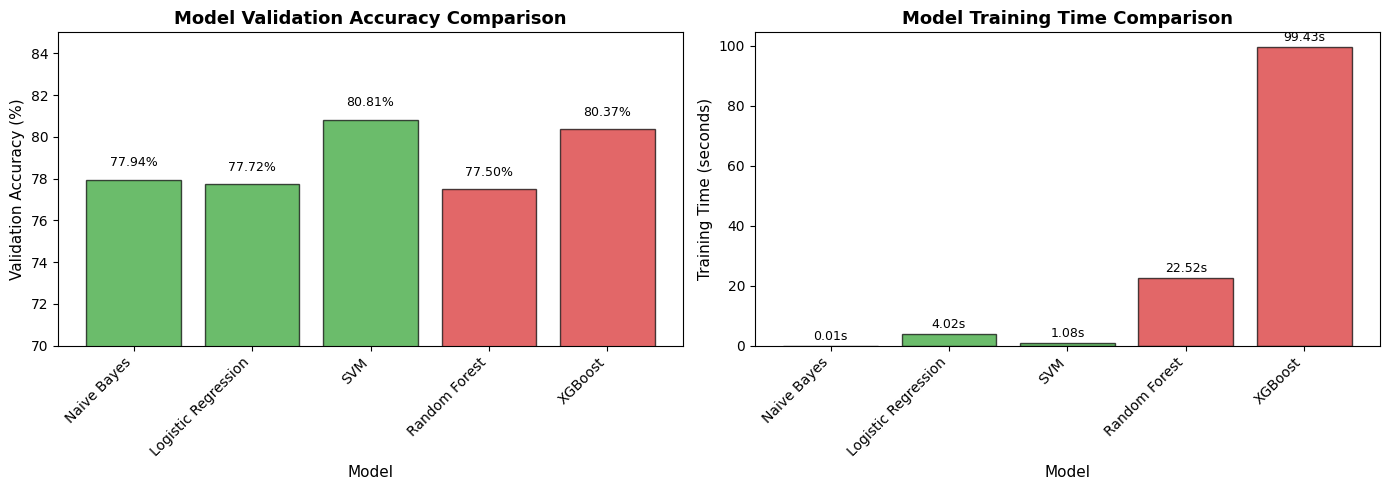


Chart saved as 'model_comparison.png'

Analysis focuses on top 3 models: Naive Bayes, Logistic Regression, and SVM


In [33]:
# Summary
print("\n" + "="*60)
print("SUMMARY - ALL MODELS")
print("="*60)

models = ['Naive Bayes', 'Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']
times = [nb_time, lr_time, svm_time, rf_time, xgb_time]
train_accs = [nb_train_acc, lr_train_acc, svm_train_acc, rf_train_acc, xgb_train_acc]
val_accs = [nb_val_acc, lr_val_acc, svm_val_acc, rf_val_acc, xgb_val_acc]

print(f"\n{'Model':<20} {'Time (s)':<12} {'Train Acc':<12} {'Val Acc':<12} {'Gap':<10}")
print("-" * 70)
for i in range(5):
    gap = train_accs[i] - val_accs[i]
    print(f"{models[i]:<20} {times[i]:<12.2f} {train_accs[i]:<12.2f} {val_accs[i]:<12.2f} {gap:<10.2f}")

# Create comparison visualization
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Validation Accuracy Comparison
x_pos = range(len(models))
colors = ['#2ca02c', '#2ca02c', '#2ca02c', '#d62728', '#d62728']  # green for top 3, red for others
bars = ax1.bar(x_pos, val_accs, color=colors, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Model', fontsize=11)
ax1.set_ylabel('Validation Accuracy (%)', fontsize=11)
ax1.set_title('Model Validation Accuracy Comparison', fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.set_ylim(70, 85)

# Add value labels on bars
for bar, val in zip(bars, val_accs):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{val:.2f}%', ha='center', va='bottom', fontsize=9)

# Plot 2: Training Time Comparison
bars2 = ax2.bar(x_pos, times, color=colors, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Model', fontsize=11)
ax2.set_ylabel('Training Time (seconds)', fontsize=11)
ax2.set_title('Model Training Time Comparison', fontsize=13, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models, rotation=45, ha='right')

# Add value labels on bars
for bar, t in zip(bars2, times):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{t:.2f}s', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved as 'model_comparison.png'")
print("\nAnalysis focuses on top 3 models: Naive Bayes, Logistic Regression, and SVM")

In [34]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Get predictions for all models on validation set
print("="*70)
print("CLASSIFICATION REPORTS - VALIDATION SET")
print("="*70)

# Model 1: Naive Bayes
print("\n" + "="*70)
print("NAIVE BAYES")
print("="*70)
nb_pred = nb.predict(X_val_vec)
print(classification_report(y_val, nb_pred, target_names=['Negative', 'Neutral', 'Positive']))
nb_acc = accuracy_score(y_val, nb_pred)
print(f"Overall Accuracy: {nb_acc*100:.2f}%")

CLASSIFICATION REPORTS - VALIDATION SET

NAIVE BAYES
              precision    recall  f1-score   support

    Negative       0.89      0.07      0.13       237
     Neutral       0.60      0.01      0.02       282
    Positive       0.78      1.00      0.88      1743

    accuracy                           0.78      2262
   macro avg       0.76      0.36      0.34      2262
weighted avg       0.77      0.78      0.69      2262

Overall Accuracy: 77.94%


In [35]:
# Model 2: Logistic Regression
print("\n" + "="*70)
print("LOGISTIC REGRESSION")
print("="*70)
lr_pred = lr.predict(X_val_vec)
print(classification_report(y_val, lr_pred, target_names=['Negative', 'Neutral', 'Positive']))
lr_acc = accuracy_score(y_val, lr_pred)
print(f"Overall Accuracy: {lr_acc*100:.2f}%")


LOGISTIC REGRESSION
              precision    recall  f1-score   support

    Negative       0.48      0.62      0.54       237
     Neutral       0.33      0.47      0.38       282
    Positive       0.95      0.85      0.90      1743

    accuracy                           0.78      2262
   macro avg       0.59      0.65      0.61      2262
weighted avg       0.83      0.78      0.80      2262

Overall Accuracy: 77.72%


In [36]:
# Model 3: SVM
print("\n" + "="*70)
print("SVM")
print("="*70)
svm_pred = svm.predict(X_val_vec)
print(classification_report(y_val, svm_pred, target_names=['Negative', 'Neutral', 'Positive']))
svm_acc = accuracy_score(y_val, svm_pred)
print(f"Overall Accuracy: {svm_acc*100:.2f}%")


SVM
              precision    recall  f1-score   support

    Negative       0.50      0.54      0.52       237
     Neutral       0.38      0.38      0.38       282
    Positive       0.93      0.91      0.92      1743

    accuracy                           0.81      2262
   macro avg       0.60      0.61      0.61      2262
weighted avg       0.81      0.81      0.81      2262

Overall Accuracy: 80.81%


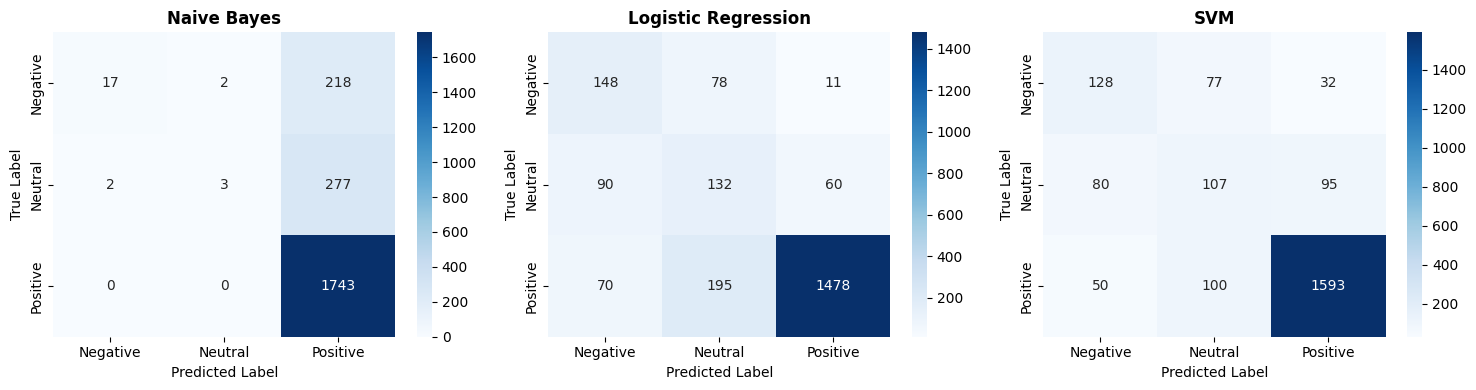

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrices for top 3 models
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

models_data = [
    ('Naive Bayes', nb_pred, y_val),
    ('Logistic Regression', lr_pred, y_val),
    ('SVM', svm_pred, y_val)
]

for idx, (name, pred, true) in enumerate(models_data):
    cm = confusion_matrix(true, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    axes[idx].set_title(f'{name}', fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

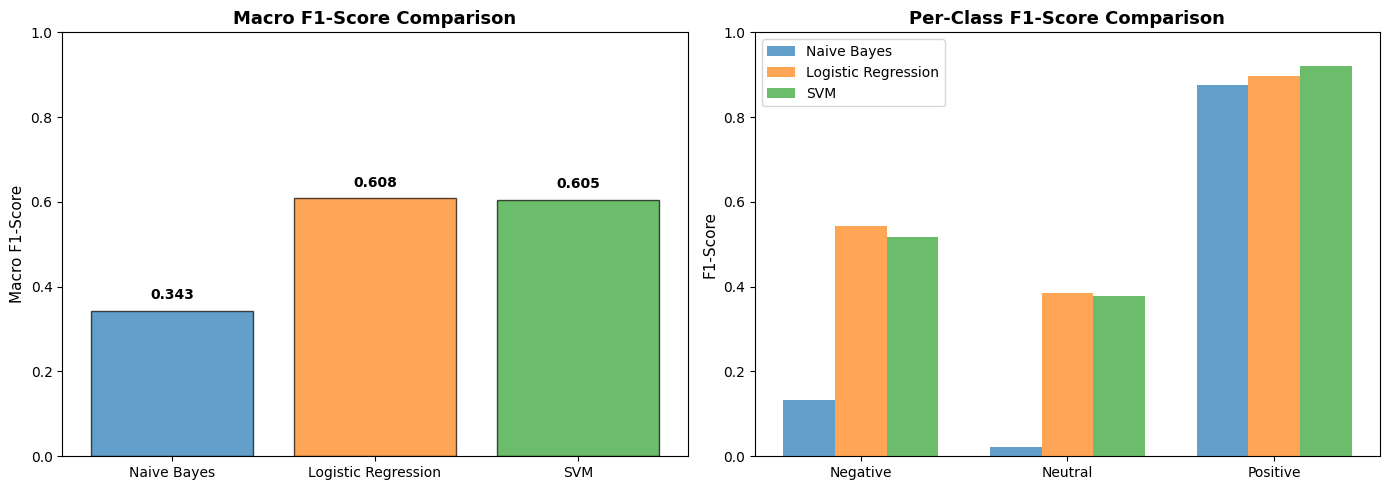

Macro F1-Scores:
Naive Bayes: 0.343
Logistic Regression: 0.608
SVM: 0.605


In [38]:
# Extract F1-scores for comparison
from sklearn.metrics import f1_score

# Calculate macro F1 for each model
nb_f1_macro = f1_score(y_val, nb_pred, average='macro')
lr_f1_macro = f1_score(y_val, lr_pred, average='macro')
svm_f1_macro = f1_score(y_val, svm_pred, average='macro')

# Calculate per-class F1 scores
nb_f1_per_class = f1_score(y_val, nb_pred, average=None)
lr_f1_per_class = f1_score(y_val, lr_pred, average=None)
svm_f1_per_class = f1_score(y_val, svm_pred, average=None)

# Create comparison chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Macro F1-Score Comparison
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
macro_f1s = [nb_f1_macro, lr_f1_macro, svm_f1_macro]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

bars = ax1.bar(models, macro_f1s, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Macro F1-Score', fontsize=11)
ax1.set_title('Macro F1-Score Comparison', fontsize=13, fontweight='bold')
ax1.set_ylim(0, 1)

for bar, f1 in zip(bars, macro_f1s):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{f1:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Chart 2: Per-Class F1-Scores
import numpy as np

x = np.arange(3)
width = 0.25

bars1 = ax2.bar(x - width, nb_f1_per_class, width, label='Naive Bayes', color='#1f77b4', alpha=0.7)
bars2 = ax2.bar(x, lr_f1_per_class, width, label='Logistic Regression', color='#ff7f0e', alpha=0.7)
bars3 = ax2.bar(x + width, svm_f1_per_class, width, label='SVM', color='#2ca02c', alpha=0.7)

ax2.set_ylabel('F1-Score', fontsize=11)
ax2.set_title('Per-Class F1-Score Comparison', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax2.legend()
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('f1_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Macro F1-Scores:")
print(f"Naive Bayes: {nb_f1_macro:.3f}")
print(f"Logistic Regression: {lr_f1_macro:.3f}")
print(f"SVM: {svm_f1_macro:.3f}")

In [39]:
# Create comprehensive summary table
print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE SUMMARY")
print("="*80)

summary = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
    'Accuracy': [f'{nb_acc*100:.2f}%', f'{lr_acc*100:.2f}%', f'{svm_acc*100:.2f}%'],
    'Macro F1': [f'{nb_f1_macro:.3f}', f'{lr_f1_macro:.3f}', f'{svm_f1_macro:.3f}'],
    'Neg F1': [f'{nb_f1_per_class[0]:.3f}', f'{lr_f1_per_class[0]:.3f}', f'{svm_f1_per_class[0]:.3f}'],
    'Neu F1': [f'{nb_f1_per_class[1]:.3f}', f'{lr_f1_per_class[1]:.3f}', f'{svm_f1_per_class[1]:.3f}'],
    'Pos F1': [f'{nb_f1_per_class[2]:.3f}', f'{lr_f1_per_class[2]:.3f}', f'{svm_f1_per_class[2]:.3f}']
})

print("\n", summary.to_string(index=False))

print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)
print("- Best Overall: SVM (80.81% accuracy, 0.605 macro F1)")
print("- Best Generalization: Naive Bayes (0.70% overfitting gap)")
print("- Best Minority Class Performance: Logistic Regression & SVM")
print("- Critical Issue: All models struggle with Neutral class")
print("- Naive Bayes: Ignores minority classes (0.13 Neg F1, 0.02 Neu F1)")
print("- Class Imbalance Impact: Macro F1 much lower than accuracy")


COMPREHENSIVE PERFORMANCE SUMMARY

               Model Accuracy Macro F1 Neg F1 Neu F1 Pos F1
        Naive Bayes   77.94%    0.343  0.133  0.021  0.876
Logistic Regression   77.72%    0.608  0.543  0.384  0.898
                SVM   80.81%    0.605  0.517  0.378  0.920

KEY FINDINGS
- Best Overall: SVM (80.81% accuracy, 0.605 macro F1)
- Best Generalization: Naive Bayes (0.70% overfitting gap)
- Best Minority Class Performance: Logistic Regression & SVM
- Critical Issue: All models struggle with Neutral class
- Naive Bayes: Ignores minority classes (0.13 Neg F1, 0.02 Neu F1)
- Class Imbalance Impact: Macro F1 much lower than accuracy
